<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:`</b>` Привет, работа должна быть выполнена на русском языке. Описательная часть должна быть более развернутой. Тетрадка должна выполняться в тренажере</s>
</div>

<h1>Прогнозирование оттока клиентов телеком-оператора ТелеДом</h1>

Telecom operator TeleDom wants to combat customer outflow. To do this, its employees will begin to offer promotional codes and special conditions to everyone who plans to refuse communication services. To find such users in advance, TeleDom needs a model that will predict whether a subscriber will break the contract. The operator’s team collected personal data about some clients, information about their tariffs and services. The task is to train a model on this data to predict customer churn

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Задача — обучить на этих данных модель для прогноза оттока клиентов.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Описательная часть получилась очень компактной, в нее нужно добавить название проекта, цели и задачи проекта, как будет определено, что цели достигнуты? Это важная часть проекта и такой навык обязательно пригодится тебе в будущем. Названия разделов тоже должны быть на русском языке</s>
</div>


<b>Цели и задачи проекта</b>

Основная цель проекта – разработать модель машинного обучения, которая сможет предсказывать вероятность оттока клиентов телеком-оператора TeleDom на основе анализа их поведения и использования услуг.


Задачи проекта включают:


- Анализ предоставленных данных о клиентах и их использовании услуг.<br>
- Предобработка данных для подготовки к обучению модели.<br>
- Выбор и обучение модели машинного обучения для прогнозирования оттока. <br>
- Оценка эффективности модели с использованием соответствующих метрик.<br>

Критерии успеха:<br>
 Проект будет считаться успешным, если достигнуты следующие показатели:

- AUC-ROC выше 0.85.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

# **Шаг 1. Загрузка данных**






In [ ]:
!pip install pyspark
!pip install phik
!pip install catboost
!pip install --upgrade scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import sklearn
from sklearn.preprocessing import OneHotEncoder
from pyspark.sql import SparkSession
from phik import resources, report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


     |████████████████████████████████| 198 kB 1.1 MB/s eta 0:00:01
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.3
    Uninstalling py4j-0.10.9.3:
      Successfully uninstalled py4j-0.10.9.3


In [ ]:
RANDOM_STATE=190224

<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки, определена константа RANDOM_STATE!
</div>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#load datasets
contract = pd.read_csv('/datasets/contract_new.csv')
display(contract.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [ ]:
#size of dataset contract
contract.shape

(7043, 8)

In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
print(contract.isnull().sum())

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [ ]:
duplicate_count = contract.duplicated(subset='customerID', keep=False).sum()
print(duplicate_count)

0


In [ ]:
# #assigning a column index
# contract.set_index('customerID', inplace=True)

An initial review of the data was carried out
 in the "contract" dataset. 7043 rows, 8 columns. Some data types should be changed to better suit the information in them. The data should be checked for obvious and hidden duplicates


Первичный анализ данных был проведен в наборе данных «контракт». 7043 строки, 8 столбцов. Некоторые типы данных следует изменить, чтобы они лучше соответствовали содержащейся в них информации. Данные следует проверить на наличие явных и скрытых дубликатов.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [ ]:
#load dataset
internet = pd.read_csv('/datasets/internet_new.csv')
display(internet.head())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
#size of dataset internet
internet.shape

(5517, 8)

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
print(internet.isnull().sum())

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [ ]:
duplicate_count = internet.duplicated(subset='customerID', keep=False).sum()
print(duplicate_count)

0


In [ ]:
# #assigning a column index
# internet.set_index('customerID', inplace=True)

An initial review of the data was carried out in the "internet" dataset. 5517 rows, 8 columns. Some data types should be changed to better suit the information in them.

Первичный анализ данных был проведен в наборе данных «Интернет». 5517 строк, 8 столбцов. Некоторые типы данных следует изменить, чтобы они лучше соответствовали содержащейся в них информации.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь тоже должны быть выводы, лучше писать их своими словами а не переводя английский текст. Выводы должны быть после загрузки и просмотра каждого датасета</s>
</div>

In [ ]:
personal = pd.read_csv('/datasets/personal_new.csv')
display(personal.head())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
#size of dataset personal
personal.shape

(7043, 5)

In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
print(personal.isnull().sum())

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


In [ ]:
duplicate_count = personal.duplicated(subset='customerID', keep=False).sum()
print(duplicate_count)

0


In [ ]:
# #assigning a column index
# personal.set_index('customerID', inplace=True)

An initial review of the data was carried out in the "personal" dataset. 7043 rows, 5 columns. Some data types should be changed to better suit the information in them. The data should be checked for obvious and hidden duplicates

Первичный анализ данных был проведен в «personal» наборе данных. 7043 строки, 5 столбцов. Некоторые типы данных следует изменить, чтобы они лучше соответствовали содержащейся в них информации. Данные следует проверить на наличие явных и скрытых дубликатов.

In [ ]:
phone = pd.read_csv('/datasets/phone_new.csv')
display(phone.head())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
#size of dataset phone
phone.shape

(6361, 2)

In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
print(phone.isnull().sum())

customerID       0
MultipleLines    0
dtype: int64


In [ ]:
duplicate_count = phone.duplicated(subset='customerID', keep=False).sum()
print(duplicate_count)

0


In [ ]:
# #assigning a column index
# phone.set_index('customerID', inplace=True)

Первоначальный анализ данных был проведен в наборе данных «Phone». 6361 строка, 2 столбца.Пропущенные данные отсутствуют. Дубликаты по customerID отсуствуют

## Вывод по загрузке данных





Data from 4 datasets was successfully loaded.  The data needs to be preprocessed. These will be done in the next section




Данные из 4 наборов данных были успешно загружены. Данные необходимо предварительно обработать. Это будет сделано в следующем разделе.

# **Шаг 2. Исследовательский анализ данных и предобработка**

## Датасет Contract**















<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> В работе должны бытт комменарии и рассуждения (в Markdown ячейках), что делаешь, почему именно так и что в итоге получется.</s>
</div>

В данном датасете необходимо выполнить следующие шаги для исследовательского анализа данных и предобработки:<br>
-Перевод названия колонок в нижний регистр, так как это является общепринятой практикой.  
-Поиск явных дубликатов  
-Поиск пропущенных данных  
-Удаление явных дубликатов, если они есть  
-Перевод формата столбцов с датами в формат datetime64  
-Перевод totalcharges в числовой формат  
-Если в этой колонке будут найдены  пропуски - это будет означать, что существуют клиенты, которые еще не успели внести ни одну плату, и следовательно эти данные можно будет заменить 0  
-Необходимо завести целевую переменную - отток клиентов - если они разорвали контракт в колонке enddate будет стоять дата окончания контракта   
-Если дата окончания контракта не стоит, следовательно клиент продолжает пользоваться услугами, и можно заменить пропущенные данные на дату 2020-02-01 - контракты актуальны до этой даты.
-Для числовых данных провести анализ на разброс данных и выбросы с помощью графика Boxplot  
-Провести анализ распределения целевой переменной Churn.



<div class="alert alert-success">
<b>👍 Успех:</b> Отличный план!
</div>

In [ ]:
#converting column names to lowercase
contract.columns = contract.columns.str.lower()

In [ ]:
#looking for obvious duplicates
duplicates = contract.duplicated()
print(duplicates.sum())

0


In [ ]:
#delete dublicates
contract = contract.drop_duplicates()
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 495.2+ KB


In [ ]:
# Convert 'begindate' and 'enddate' to datetime
contract['begindate'] = pd.to_datetime(contract['begindate'])
contract['enddate'] = pd.to_datetime(contract['enddate'], errors='coerce')

# Convert 'totalcharges' to numeric, errors='coerce' will replace non-numeric values with NaN
contract['totalcharges'] = pd.to_numeric(contract['totalcharges'], errors='coerce')

# Check the new data types
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1101 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 495.2+ KB
None


In [ ]:
# Replacing all types of missing values with 0
contract['totalcharges'].fillna(0, inplace=True)

Найденные пропуски  предположительно означают,что существуют клиенты, которые еще не успели внести ни одну плату, и следовательно эти данные можно будет заменить 0

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Что это за пропуски? Откуда они взялись? Почему такая замена? Все преобразования, заполнения пропусков, объединение данных должны быть объяснены</s>
</div>

In [ ]:
# Creating a target column 'churn' indicating whether a customer has churned
# 1 if 'end_date' has a date (the contract was terminated), 0 otherwise
contract['churn'] = contract['enddate'].notna().astype(int)

# Checking the distribution of the target variable
print(contract['churn'].value_counts())

0    5942
1    1101
Name: churn, dtype: int64


In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1101 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   churn             7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 550.2+ KB


In [ ]:
#replace missing end_date because the information in contracts is actual  to 2020-02-01
replacement_date = pd.Timestamp('2020-02-01')
contract['enddate'] = contract['enddate'].fillna(replacement_date)

In [ ]:
contract.head(3)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0


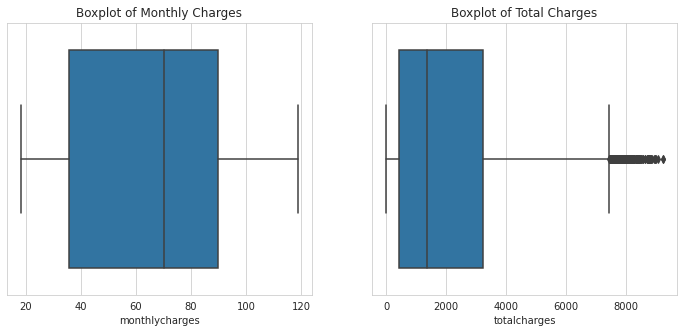

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating boxplots for 'monthlycharges' and 'totalcharges'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=contract['monthlycharges'])
plt.title('Boxplot of Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(x=contract['totalcharges'])
plt.title('Boxplot of Total Charges')

plt.show()

An analysis was conducted for anomalies and outliers, with particular attention paid to the TotalCharges column. As a result of the analysis, it became clear that there was significant variation in the data, which may indicate the presence of long-term customers with high overall costs.

Был проведен анализ аномалий и выбросов, при этом особое внимание было уделено столбцу TotalCharges. В результате анализа стало ясно, что в данных наблюдаются значительные разбросы, что может указывать на наличие долгосрочных клиентов с высокими общими затратами.

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Почему этот анализ был проведен только для двух столбцов?</s>
</div>

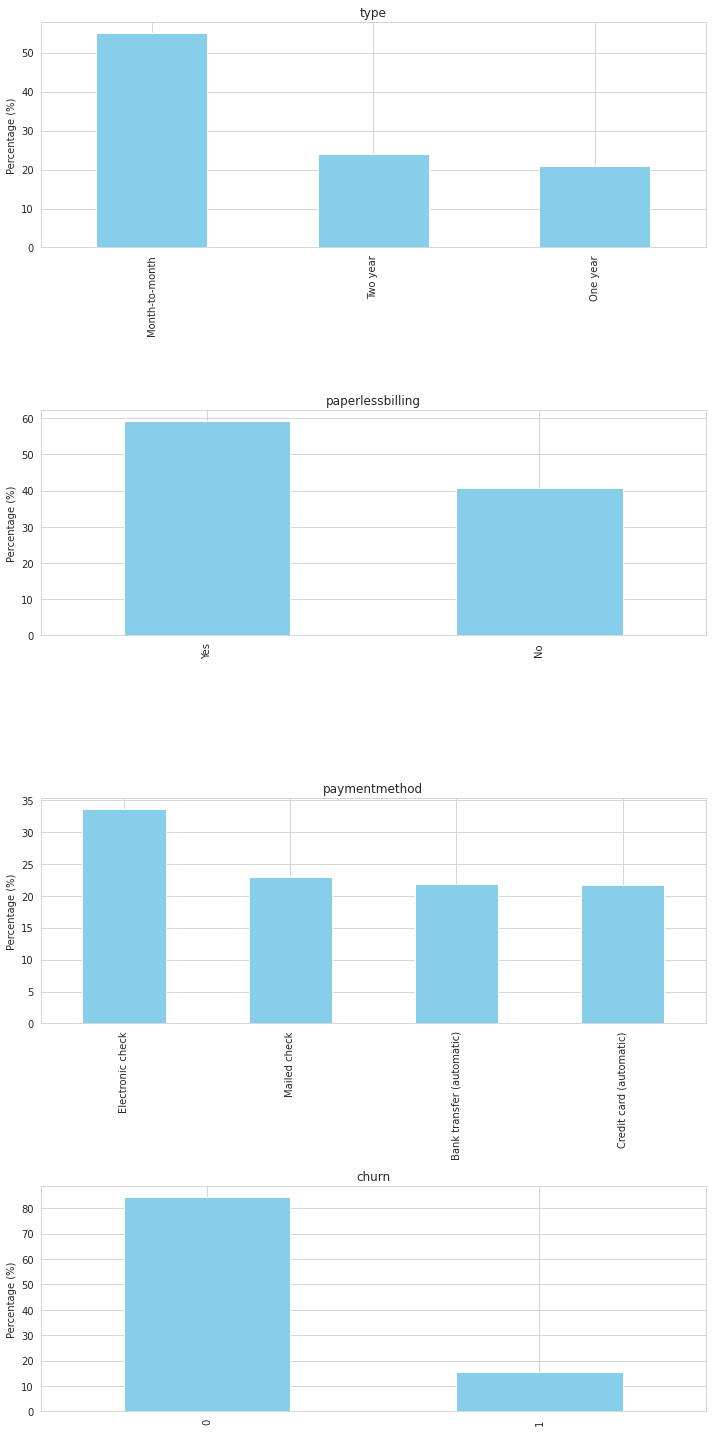

In [ ]:
columns = ['type', 'paperlessbilling', 'paymentmethod', 'churn']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(columns):

    value_counts = contract[col].value_counts(normalize=True) * 100
    value_counts.plot(kind='bar', ax=axes[i], title=col, color='skyblue')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

Среди типов оплаты контракта преобладает  -ежемесячный

Электронный тип оплаты преобадает,остальные 3 типа оплаты занимают примерно одинаковые пропорции

Электронный расчётный лист запрашивает больше половины клиентов.

In [ ]:
contract['churn'].describe()

count    7043.000000
mean        0.156325
std         0.363189
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

**Summary of Step 2: Exploratory Data Analysis and Preprocessing (Dataset "Contract")**

As part of the section "Exploratory data analysis and preprocessing" for the "Contract" dataset, the following steps were performed and the corresponding conclusions were drawn:  



**Data Preliminary Inspection:**  The dataset was carefully examined for data types, missing values, and general content. The data was found to contain both numeric and categorical features, as well as missing values in the EndDate column.


**Handling missing values:** Missing values in EndDate were interpreted as indicators of ongoing contracts (customers continuing to use services). These values have been replaced to the date 01.02.2020 - data in contracts is actual till this date


**Anomaly Analysis and Processing:** An analysis was conducted for anomalies and outliers, with particular attention paid to the TotalCharges column. As a result of the analysis, it became clear that there was significant variation in the data, which may indicate the presence of long-term customers with high overall costs.

**Analysis of the target variable:** analysis of the distribution of the target variable (customer churn) was carried out, which showed that about 15.63% of the customers terminated their contract. This provides the basis for further construction of a churn forecasting model.

В рамках раздела «Исследовательский анализ и предварительная обработка данных» для набора данных «Contract» были выполнены следующие действия и сделаны соответствующие выводы:

Предварительная проверка данных. Набор данных был тщательно проверен на предмет типов данных, пропущенных значений и общего содержания. Было обнаружено, что данные содержат как числовые, так и категориальные характеристики, а также отсутствующие значения в столбце EndDate.

Обработка пропущенных значений. Отсутствующие значения в EndDate интерпретировались как индикаторы текущих контрактов (клиенты продолжают пользоваться услугами). Эти значения заменены на дату 01.02.2020 - данные в договорах актуальны до этой даты.

Анализ и обработка аномалий. Был проведен анализ аномалий и выбросов, при этом особое внимание было уделено столбцу TotalCharges. В результате анализа стало ясно, что в данных наблюдаются значительные разбросы, что может указывать на наличие долгосрочных клиентов с высокими общими затратами.

Среди типов оплаты контракта преобладает -ежемесячный.Электронный расчётный лист запрашивает больше половины клиентов. Электронный тип оплаты преобадает.

Анализ целевой переменной: был проведен анализ распределения целевой переменной (отток клиентов), который показал, что около 15,63% клиентов расторгли договор. Это обеспечивает основу для дальнейшего построения модели прогнозирования оттока клиентов.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Датасет **Internet**

В данном датасете необходимо выполнить следующие шаги для исследовательского анализа данных и предобработки:<br> -Перевод названия колонок в нижний регистр, так как это является общепринятой практикой.   
-Поиск пропущенных данных  
-Дубликаты в данном датасете не требуют удаления,так как данные в колонках не носят персонафицированный характер и могут быть одинакомыми для нескольких клиентов   
-Проанализировать  распределение категориальных данных

In [ ]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
#converting column names to lowercase
internet.columns = internet.columns.str.lower()

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


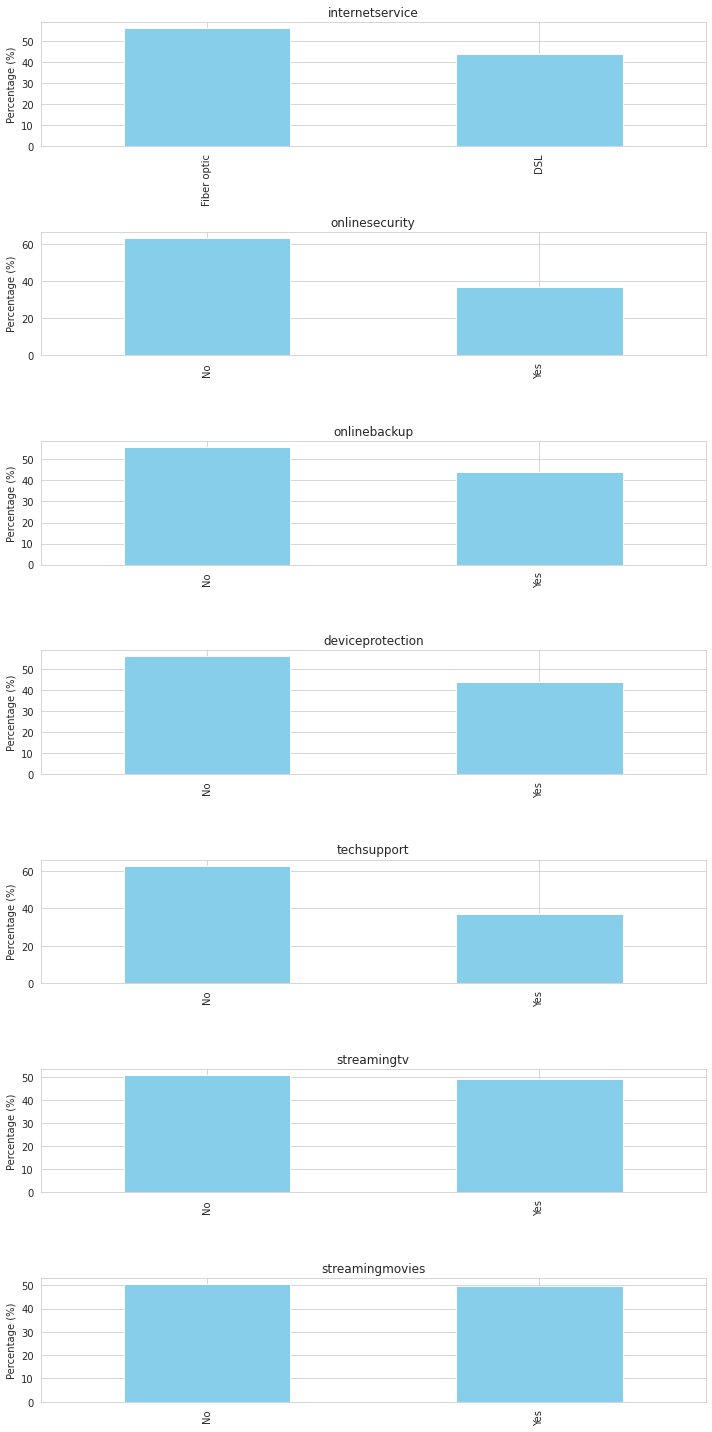

In [ ]:
columns = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
           'techsupport', 'streamingtv', 'streamingmovies']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(columns):

    value_counts = internet[col].value_counts(normalize=True) * 100
    value_counts.plot(kind='bar', ax=axes[i], title=col, color='skyblue')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

**Fiber optic usage:** Approximately 56.12% of users use a fiber optic Internet connection. This indicates the high popularity of fiber optics among the sample of users under consideration.


**Online Security:** About 36.60% of users subscribe to an online security service. This shows that the service is not as popular as it could be, perhaps due to the added cost or lack of awareness among users about the benefits.

**Online Backup:** Online backup service is used by approximately 44.03% of users. This indicates the service's moderate popularity.


**Device Protection:** Approximately 43.90% of users have used the device protection service, which is almost identical to the popularity of online backup.


**Tech Support:** Technical support services are used by about 37.05% of users, which makes it comparatively less popular among the services offered.


**Internet TV (Streaming TV):** Almost half of users (49.07%) use a streaming TV service, making it one of the more popular services among those reviewed.

**Movies via the Internet (Streaming Movies):** Slightly more popular than streaming television is the movie streaming service, which is used by 49.52% of users.


**Conclusion:** Overall, the data shows that entertainment-related services (such as TV and movie streaming) are more popular than security and support services (such as online security and technical support). Fiber optic internet connections are also very popular, which may indicate a desire among users to have a high-speed connection for more demanding services such as video streaming.

Использование оптоволокна: примерно 56,12% пользователей используют оптоволоконное подключение к Интернету. Это свидетельствует о высокой популярности оптоволокна среди рассматриваемой выборки пользователей.

Интернет-безопасность: около 36,60% пользователей подписываются на службу онлайн-безопасности. Это показывает, что услуга не так популярна, как могла бы быть, возможно, из-за дополнительной стоимости или недостаточной осведомленности пользователей о преимуществах.

Онлайн-резервное копирование. Службой онлайн-резервного копирования пользуются примерно 44,03% пользователей. Это говорит об умеренной популярности сервиса.

Защита устройства. Примерно 43,90% пользователей воспользовались услугой защиты устройств, что практически идентично популярности онлайн-резервного копирования.

Техподдержка: услугами технической поддержки пользуются около 37,05% пользователей, что делает ее сравнительно менее популярной среди предлагаемых услуг.

Интернет-телевидение (потоковое телевидение): почти половина пользователей (49,07%) используют сервис потокового телевидения, что делает его одним из наиболее популярных сервисов среди рассмотренных.

Фильмы через Интернет (Streaming Movies): Чуть более популярным, чем потоковое телевидение, является сервис потокового кино, которым пользуются 49,52% пользователей.

Вывод: в целом данные показывают, что услуги, связанные с развлечениями (такие как потоковое телевидение и фильмы), более популярны, чем услуги безопасности и поддержки (такие как онлайн-безопасность и техническая поддержка). Оптоволоконные подключения к Интернету также очень популярны, что может указывать на желание пользователей иметь высокоскоростное соединение для более требовательных услуг, таких как потоковое видео.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Изучены услуги, подключаемые пользователями интернета
</div>

**Summary of Step 2: Exploratory Data Analysis and Preprocessing (Dataset "Internet")**

Key Findings:
Analysis revealed that while the majority of customers prefer fiber optic connection, other services such as online backup and streaming services also enjoy considerable popularity.
The lack of demand for certain additional services, such as online security and device protection, could be crucial in making decisions regarding service provision strategies and marketing policies.
Proposed services could be optimized based on the customer preferences identified in the data analysis, aiming to enhance customer satisfaction and reduce churn


Анализ показал, что, хотя большинство клиентов предпочитают оптоволоконное соединение, другие услуги, такие как онлайн-резервное копирование и потоковая передача, также пользуются значительной популярностью.
Отсутствие спроса на некоторые дополнительные услуги, такие как онлайн-безопасность и защита устройств, может иметь решающее значение при принятии решений относительно стратегии предоставления услуг и маркетинговой политики.
Предлагаемые услуги могут быть оптимизированы на основе предпочтений клиентов, выявленных в результате анализа данных, с целью повышения удовлетворенности клиентов и сокращения их оттока.

## Датасет **Personal**















В данном датасете необходимо выполнить следующие шаги для исследовательского анализа данных и предобработки:<br> -Перевод названия колонок в нижний регистр, так как это является общепринятой практикой.  
-Поиск пропущенных данных  
-Дубликаты в данном датасете не требуют удаления,так как данные в колонках не носят персонафицированный характер и могут быть одинакомыми для нескольких клиентов  
-Проанализировать распределение категориальных данных  

In [ ]:
#converting column names to lowercase
personal.columns = personal.columns.str.lower()

In [ ]:
#looking for obvious duplicates
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   int64 
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
personal.head()

,customerid,gender,seniorcitizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
# Viewing unique values for each column
for column in personal.columns:
    print(f"Unique values in column {column}: {personal[column].unique()}")

Unique values in column customerid: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column gender: ['Female' 'Male']
Unique values in column seniorcitizen: [0 1]
Unique values in column partner: ['Yes' 'No']
Unique values in column dependents: ['No' 'Yes']


In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   int64 
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


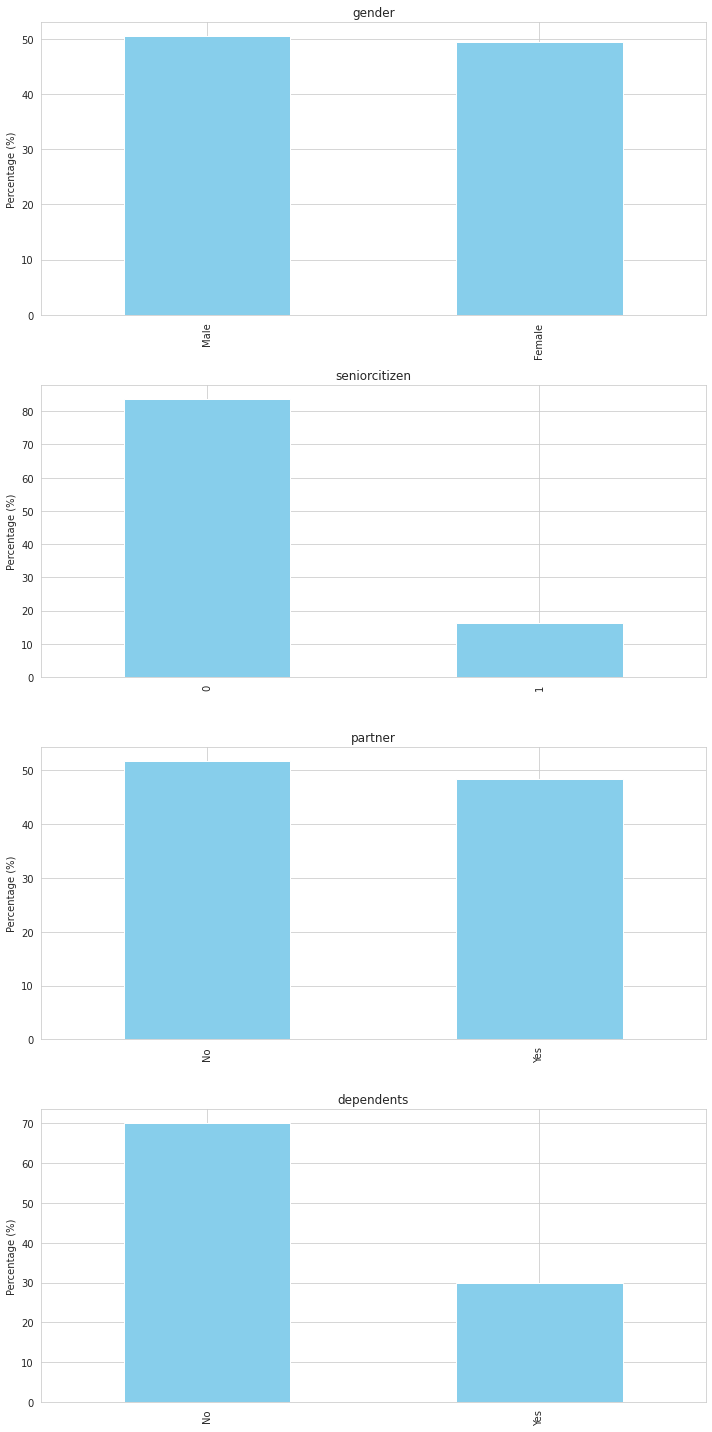

In [ ]:
columns = ['gender', 'seniorcitizen', 'partner', 'dependents']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(columns):

    value_counts = personal[col].value_counts(normalize=True) * 100
    value_counts.plot(kind='bar', ax=axes[i], title=col, color='skyblue')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

**Senior Citizens:** Approximately 16.2% of subscribers are senior citizens. This indicates that the majority of subscribers (about 83.8%) do not fall into the older generation category.


**Gender:** The gender distribution  shows that approximately 50.5% of subscribers are male, which means an almost equal distribution between men and women among subscribers. This indicates a good gender balance in the sample.


**Partner:** Approximately 48.3% of subscribers indicated that they have a partner. This suggests that the distribution between subscribers with and without partners is quite even, with a slight bias towards the absence of a partner.


**Dependents:** Only about 30% of subscribers have dependents . This shows that the majority of subscribers do not have dependents, which may indicate a young audience or an audience consisting of middle-aged people who do not have children or other dependents.

Пожилые люди: примерно 16,2% подписчиков — пожилые люди. Это свидетельствует о том, что большая часть абонентов (около 83,8%) не попадает в категорию старшего поколения.

Пол: Распределение по полу показывает, что примерно 50,5% подписчиков составляют мужчины, что означает почти равное распределение мужчин и женщин среди подписчиков. Это свидетельствует о хорошем гендерном балансе в выборке.

Партнер: Примерно 48,3% подписчиков указали, что у них есть партнер. Это говорит о том, что распределение между подписчиками с партнерами и без партнеров вполне равномерное, с небольшим уклоном в сторону отсутствия партнера.

Иждивенцы: только около 30% подписчиков имеют иждивенцев. Это показывает, что у большинства подписчиков нет иждивенцев, что может указывать на молодую аудиторию или аудиторию, состоящую из людей среднего возраста, не имеющих детей или других иждивенцев.

<div class="alert alert-success">
<b>👍 Успех:</b> Датасет с личными данными изучен!
</div>

**Summary of Step 2: Exploratory Data Analysis and Preprocessing (Dataset "Personal")**

Based on the exploratory data analysis and preprocessing of the "personal" dataset:  

The dataset consists of 7043 entries with four columns: "gender," "seniorcitizen," "partner," and "dependents."

<!-- **OneHotEncoding Application:**  The categorical variables within the dataset were effectively transformed using OneHotEncoding. This preprocessing technique is crucial for converting categorical data into a format that can be provided to ML models, which require numerical input. Variables such as gender, partnership status, senior citizen status, and dependency were encoded, expanding the dataset to include binary columns for each category. This transformation enables models to better understand and utilize the structured categorical information. -->

**Visualization Insights:** Through the visualization we gained valuable insights into the composition of the dataset's demographic. For example, the proportion of senior citizens in the dataset is approximately 16.2%, highlighting a minority of the population with potentially different needs and preferences. Gender distribution is nearly balanced, with a slight majority of male customers. The data on partnership and dependency status reveal a diverse customer base, with less than half of the customers having partners or dependents. These insights can be instrumental in tailoring services and marketing strategies to meet the varied needs of the customer base.


На основе разведочного анализа данных и предварительной обработки «Personal» набора данных:

Набор данных состоит из 7043 записей с четырьмя столбцами: «пол», «пожилой гражданин», «партнер» и «иждивенцы».

Информация о визуализации: Благодаря визуализации мы получили ценную информацию о составе демографической группы набора данных. Например, доля пожилых людей в наборе данных составляет примерно 16,2%, что указывает на меньшинство населения с потенциально разными потребностями и предпочтениями. Распределение по гендерному признаку почти сбалансировано: незначительное большинство клиентов-мужчин. Данные о статусе партнерства и зависимости показывают разнообразную клиентскую базу: менее половины клиентов имеют партнеров или иждивенцев. Эти идеи могут сыграть важную роль в адаптации услуг и маркетинговых стратегий для удовлетворения различных потребностей клиентской базы.

## Датасет **Phone**

В данном датасете необходимо выполнить следующие шаги для исследовательского анализа данных и предобработки: -Перевод названия колонок в нижний регистр, так как это является общепринятой практикой.  
-Поиск пропущенных данных  
-Дубликаты в данном датасете не требуют удаления,так как данные в колонках не носят персонафицированный характер и могут быть одинакомыми для нескольких клиентов  
-Проанализировать распределение категориальных данных  

In [ ]:
#converting column names to lowercase
phone.columns = phone.columns.str.lower()

In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
phone.head()

,customerid,multiplelines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


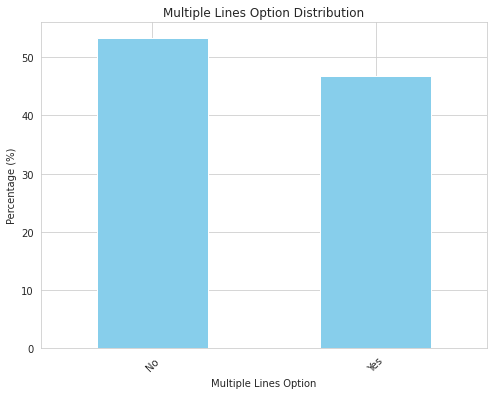

In [ ]:
value_counts = phone['multiplelines'].value_counts(normalize=True) * 100

# Visualisation
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Multiple Lines Option Distribution')
plt.ylabel('Percentage (%)')
plt.xlabel('Multiple Lines Option')
plt.xticks(rotation=45)
plt.show()

The data on the multiplelinesfeature in the phone dataset illustrates a balanced distribution of customer preferences regarding multiple line services, with a slight inclination towards not having multiple lines. This insight could be valuable for understanding customer needs and tailoring services or marketing strategies accordingly.

Данные о функции нескольких линий в наборе телефонных данных иллюстрируют сбалансированное распределение предпочтений клиентов в отношении услуг нескольких линий с небольшим уклоном в сторону отсутствия нескольких линий. Эта информация может быть полезна для понимания потребностей клиентов и соответствующей адаптации услуг или маркетинговых стратегий.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Вывод по исследовальскому анализу данных (Датасет "Phone")**

**Summary of Step 2: Exploratory Data Analysis and Preprocessing (Dataset "Phone")**

The dataset consists of 6361 entries with  columns: "multiplelines"

The "multiplelines" column indicates whether a customer has multiple lines (Yes) or not (No). The dataset shows that approximately 53.29% of customers do not have multiple lines, while around 46.71% have multiple lines.
This information provides insights into the distribution of phone service features among customers, which can be valuable for understanding customer preferences and optimizing service offerings.

Набор данных состоит из 6361 записи с столбцами: «multiplelines».

Столбец «multiplelines» указывает, есть ли у клиента несколько строк (Да) или нет (Нет). Набор данных показывает, что примерно 53,29% клиентов не имеют нескольких линий, а около 46,71% имеют несколько линий. Эта информация дает представление о распределении функций телефонных услуг среди клиентов, что может быть полезно для понимания предпочтений клиентов и оптимизации предложений услуг.


# **Шаг 3 Объединение данных**

In [ ]:
# Merge contract с personal
merged_df = contract.merge(personal, on='customerid', how='outer')

# Add data from  internet
merged_df = merged_df.merge(internet, on='customerid', how='outer')

# Add data from phone
final_df = merged_df.merge(phone, on='customerid', how='outer')

Для объединения данных в данном случае лучше всего выбрать  объединение outer  так как этот тип объединения позволяет сохранить полную информацию по всем клиентам, включая тех, кто может быть только в одном из датасетов. Это важно для комплексного анализа клиентской базы, где некоторые клиенты могут пользоваться только определенными услугами.

<div class="alert alert-success">
<b>👍 Успех:</b> Данные по всем клиентам есть в датасете с договорами, к этому датасту можно присоединять другие данные левым способом. При обнаружении данных, которых нет в этом датасете восстановить их и использовать будет невозможно
</div>

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Почему выбран такой тип объединения?</s>
</div>

In [ ]:


# Display the first few rows of the DataFrame
display(final_df .head())

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [ ]:
final_df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   churn             7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  seniorcitizen     7043 non-null   int64         
 11  partner           7043 non-null   object        
 12  dependents        7043 non-null   object        
 13  internetservice   5517 non-null   object        
 14  onlinesecurity    5517 n

Всего 7043 записи, что соответствует исходному количеству клиентов в датасете contract. Это указывает на то, что каждая запись в датасете contract нашла соответствие хотя бы в одном из других датасетов, или же все записи из contract были сохранены в результате объединения типом outer.  
Присутствие пропусков в данных: Пропуски в столбцах, связанных с интернет-услугами (internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies) и телефонными услугами (multiplelines), говорят о том, что не все клиенты пользуются этими услугами. Так, интернет-услугами пользуются 5517 клиентов, а услугами телефонии — 6361 клиент. <br>Для дальнейшего анализа необходимо ввести новую переменную -'Длительность контракта' - это позволит понять насколько долго клиенты остаются с компанией.А для дальнейшей работы с данными предполагается создать новый датафрейм и добавить в него только необходимые для анализа колонки.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Что получили после объединения? Какие особенности у нового датасета?</s>
</div>

In [ ]:
duplicate_count = final_df.duplicated(subset='customerid', keep=False).sum()
print(duplicate_count)

0


In [ ]:
# #assigning a column index
# final_df.set_index('customerid', inplace=True)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   churn             7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  seniorcitizen     7043 non-null   int64         
 11  partner           7043 non-null   object        
 12  dependents        7043 non-null   object        
 13  internetservice   5517 non-null   object        
 14  onlinesecurity    5517 n

In [ ]:
# Calculate the duration of the contract and adding new column
final_df['contract_duration'] = (final_df['enddate'] - final_df['begindate']).dt.days

Была вычислена длительность контракта каждого клиента в днях, вычитая дату начала контракта (begindate) из даты его окончания (enddate). Результат был сохранен в новом столбце contract_duration. Это позволяет анализировать, насколько долго клиенты остаются с компанией, что является важным показателем для понимания лояльности клиентов и оттока

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Что в ячейке выше?</s>
</div>

In [ ]:
final_df.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender,...,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,contract_duration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,No,DSL,No,Yes,No,No,No,No,NaN,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,...,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,No,DSL,Yes,Yes,No,No,No,No,No,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,No,Fiber optic,No,No,No,No,No,No,No,153


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         7043 non-null   object        
 1   begindate          7043 non-null   datetime64[ns]
 2   enddate            7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperlessbilling   7043 non-null   object        
 5   paymentmethod      7043 non-null   object        
 6   monthlycharges     7043 non-null   float64       
 7   totalcharges       7043 non-null   float64       
 8   churn              7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  seniorcitizen      7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internetservice    5517 non-null   object        
 14  onlinese

In [ ]:
cols = final_df.select_dtypes(include=['object','float']).columns.tolist()
# add manually identified columns
additional_cols = ['churn','contract_duration', 'seniorcitizen']

# Combine lists while ensuring uniqueness
cols = list(set(cols + additional_cols))
df = final_df[cols].copy()

В данной ячейке был сформирован список столбцов для дальнейшего  анализа, включая категориальные и вещественные переменные, а также важные идентифицированные нами столбцы churn, contract_duration. Это позволяет сфокусироваться на ключевых данных, подготовить их к анализу и моделированию, обеспечивая при этом уникальность и актуальность выборки столбцов

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Что в ячейке выше? Для чего?</s>
</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   onlinesecurity     5517 non-null   object 
 1   gender             7043 non-null   object 
 2   techsupport        5517 non-null   object 
 3   totalcharges       7043 non-null   float64
 4   streamingmovies    5517 non-null   object 
 5   contract_duration  7043 non-null   int64  
 6   multiplelines      6361 non-null   object 
 7   customerid         7043 non-null   object 
 8   streamingtv        5517 non-null   object 
 9   type               7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  seniorcitizen      7043 non-null   int64  
 12  deviceprotection   5517 non-null   object 
 13  churn              7043 non-null   int64  
 14  partner            7043 non-null   object 
 15  onlinebackup       5517 non-null   object 
 16  monthlycharges     7043 

## **Вывод**
Datasets were succesfully merged. After receiving the data combination, it is necessary to pre-process the data. To do this, duplicates will be searched for and removed if necessary. Since a large percentage of clients are not connected to the network data about them is disabled in the Internet . All missing data due to this will be the value Not Applicable. Regarding multilines, the assumption is the same - due to the absence in the table that clients do not have multilines - missing values will be filled by Not Applicableo

Наборы данных успешно объединены. После получения комбинации данных необходимо провести предварительную обработку данных. Для этого будут найдены и при необходимости удалены дубликаты. Поскольку большой процент клиентов не подключены к сети, данные о них отключены в Интернете. Все недостающие данные из-за этого будут иметь значение новое введенное значенин Not Applicable. Что касается мультилиний, предположение то же - из-за отсутствия в таблице того, что у клиентов нет мультистрок - пропущенные значения будут заполнены также Not Applicable.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Значение No используется если не подключена конкретная услуга, но подключен интерент или телефон. Заполнение всех пропусков этим значением не даст различий между этими данными</s>
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Данные готовы к дальнейшей работе
</div>

# **Шаг  4. Исследовательский анализ данных и предобработка объединенного датафрейма**

In [ ]:
#looking for obvious duplicates
duplicates = df.duplicated(keep=False)


display(df[duplicates])
print(duplicates.sum())

,onlinesecurity,gender,techsupport,totalcharges,streamingmovies,contract_duration,multiplelines,customerid,streamingtv,type,dependents,seniorcitizen,deviceprotection,churn,partner,onlinebackup,monthlycharges,paperlessbilling,internetservice,paymentmethod


0


In [ ]:
# counting persent of dublicates
duplicates = df.duplicated(keep=False).sum()
percentage_duplicates = (duplicates / len(df)) * 100

print(f"persent of dublicates: {percentage_duplicates}%")

persent of dublicates: 0.0%


In [ ]:
# fillimg missing values to multiplelines
df['multiplelines'].fillna('Not Applicable', inplace=True)

# check results
print(df[[ 'multiplelines']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   multiplelines  7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB
None


In [ ]:
# Assume missing values indicate no internet service

internet_service_columns = ['internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies'
]
# Fill missing values

# For columns indicating presence of a service, fill missing values with Not Applicable (service is not provided)
df[internet_service_columns] = df[internet_service_columns].fillna('Not Applicable')


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   onlinesecurity     7043 non-null   object 
 1   gender             7043 non-null   object 
 2   techsupport        7043 non-null   object 
 3   totalcharges       7043 non-null   float64
 4   streamingmovies    7043 non-null   object 
 5   contract_duration  7043 non-null   int64  
 6   multiplelines      7043 non-null   object 
 7   customerid         7043 non-null   object 
 8   streamingtv        7043 non-null   object 
 9   type               7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  seniorcitizen      7043 non-null   int64  
 12  deviceprotection   7043 non-null   object 
 13  churn              7043 non-null   int64  
 14  partner            7043 non-null   object 
 15  onlinebackup       7043 non-null   object 
 16  monthlycharges     7043 

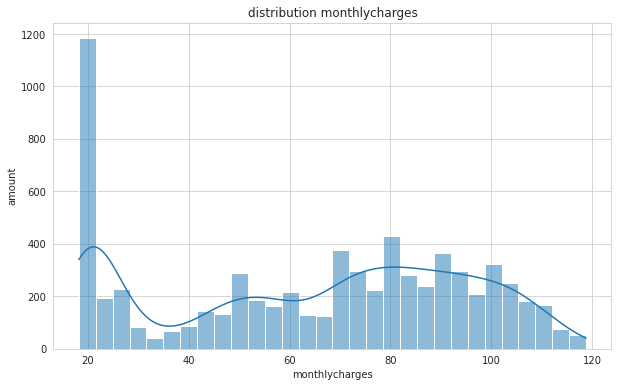

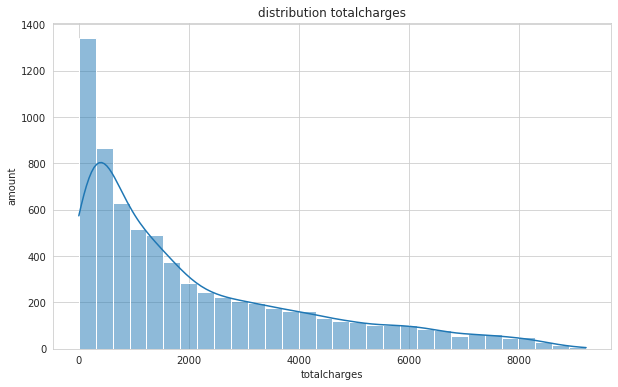

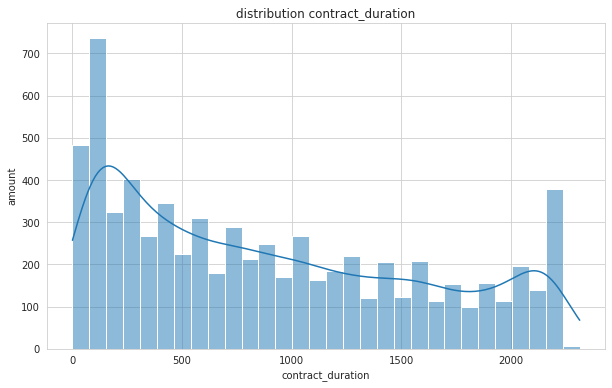

In [ ]:
# Visualisation of numeric features
num_features = ['monthlycharges', 'totalcharges', 'contract_duration']
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'distribution {feature}')
    plt.xlabel(feature)
    plt.ylabel('amount')
    plt.show()


Looking at the graph, we can say that for both columns there is an increase at the beginning of the graph. for monthly charges this value is about 20 and for total charges it is close to 0. for monthly charges there is a smooth increase in the amount up to 80 and then a smooth decrease

Глядя на график, можно сказать, что для обоих столбцов в начале графика наблюдается рост. для ежемесячных начислений это значение около 20, а для общих начислений близко к 0. для ежемесячных начислений происходит плавное увеличение суммы до 80, а затем плавное уменьшение
Для столбца длительность контракта - характерно большое количество краткосрочных контрактов - затем постепенное уменьшение и небольшой пик на значениях около 2500

In [ ]:
def remove_outliers(df, column):
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate boundaries to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame to remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# # Remove outliers for 'monthlycharges'
# df_final = remove_outliers(df, 'monthlycharges')

# # Remove outliers for 'totalcharges'
# df_final = remove_outliers(df_final, 'totalcharges')

# # Remove outliers for 'contract_duration'
# df_final = remove_outliers(df_final, 'contract_duration')

In [ ]:
import pandas as pd
shape_ = (10000, 3)
df = pd.DataFrame(np.exp(np.random.random(shape_))*np.random.random(shape_)*100, columns = ['a', 'b', 'c'])

In [ ]:
df_ = df.copy()
for i in list(df.columns):
  df_ = remove_outliers(df_, i)

In [ ]:
df_.shape

(9883, 3)

In [ ]:
def find_outs(df, column):
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate boundaries to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


def remove_outs(df, column, lower_bound, upper_bound):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df_ = df.copy()
dict_ = dict()
for i in list(df_.columns):
  dict_[i] = find_outs(df_, i)

In [ ]:
dict_

{'a': (-79.3237842576116, 241.3872303367687),
 'b': (-83.45555094941875, 244.62951038653955),
 'c': (-84.31462828870782, 245.63396678647507)}

In [ ]:
df_[i]

0        13.385937
1        47.493814
2       100.360001
3        51.244923
4        57.433325
           ...    
9995     42.291351
9996     34.549156
9997     33.996289
9998     29.063525
9999    101.387260
Name: a, Length: 10000, dtype: float64

In [ ]:
for i in list(df_.columns):
  df_ = remove_outs(df_, i, dict_[i][0], dict_[i][1])

In [ ]:
df_.shape

(9847, 3)

<!-- Outliers which could effect the data analysis were removed (2.77% of data). -->

<!-- Выбросы, которые могли повлиять на анализ данных, были удалены (2,77% данных). -->

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Какие выбросы? В датасете были неправдоподобные данные? Где исследования подтверждающие наличие таких данных?</s>
</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   onlinesecurity     7043 non-null   object 
 1   gender             7043 non-null   object 
 2   techsupport        7043 non-null   object 
 3   totalcharges       7043 non-null   float64
 4   streamingmovies    7043 non-null   object 
 5   contract_duration  7043 non-null   int64  
 6   multiplelines      7043 non-null   object 
 7   customerid         7043 non-null   object 
 8   streamingtv        7043 non-null   object 
 9   type               7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  seniorcitizen      7043 non-null   int64  
 12  deviceprotection   7043 non-null   object 
 13  churn              7043 non-null   int64  
 14  partner            7043 non-null   object 
 15  onlinebackup       7043 non-null   object 
 16  monthlycharges     7043 

In [ ]:
# # Visualisation of numeric features
# num_features = ['monthlycharges', 'totalcharges','contract_duration' ]
# for feature in num_features:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[feature], kde=True, bins=30)
#     plt.title(f'distribution {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('amount')
#     plt.show()

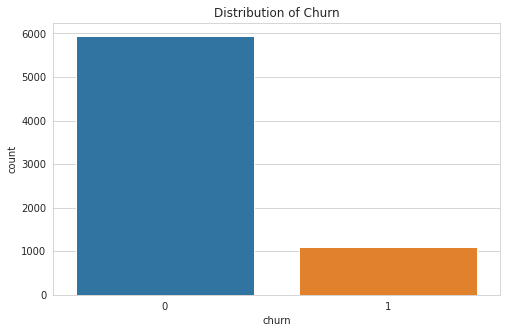

In [ ]:
#Distribution of Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.show()


There is a large class imbalance for the target variable.

Для целевой переменной существует большой дисбаланс классов. Однако выбранная метрика оценки — площадь под ROC-кривой — является устойчивой к дисбалансу классов.  Это делает ROC-AUC подходящей метрикой  позволяя сосредоточиться на улучшении способности модели различать классы, а не только на точности предсказаний.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Наша метрика чувствствительна к дисбалансу?</s>
</div>

In [ ]:
df_for_phik = df.drop(columns=['customerid'])

# Specify your interval columns. For example, 'monthlycharges' and 'totalcharges' are numerical.
interval_columns = ['monthlycharges', 'totalcharges', 'contract_duration']

# Calculate the phik correlation matrix
phik_matrix = df_for_phik.phik_matrix(interval_cols=interval_columns)

# Extract the 'churn' column to get correlations with 'churn' only
churn_correlation = phik_matrix['churn'].sort_values(ascending=False)


churn_correlation = churn_correlation.drop('customerid', errors='ignore')

# Print the correlation of 'churn' with all other variables
print(churn_correlation)

# # Visualize the phik correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(phik_matrix.drop(index=['customerid'], columns=['customerid'], errors='ignore'), annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title("Phik Correlation Matrix")
# plt.show()

churn                1.000000
contract_duration    0.374569
totalcharges         0.302890
partner              0.226688
monthlycharges       0.225925
paymentmethod        0.214832
multiplelines        0.105101
type                 0.094015
onlinebackup         0.089704
streamingmovies      0.086577
seniorcitizen        0.086159
deviceprotection     0.085608
paperlessbilling     0.083398
streamingtv          0.078545
onlinesecurity       0.058659
internetservice      0.056621
techsupport          0.051537
dependents           0.046871
gender               0.008581
Name: churn, dtype: float64


In [ ]:
# display(phik_matrix)

<!-- Totalcharges имеет заметную положительную корреляцию с онлайн защитой,онлайн бэкап,стриминговые сервисами,и стримингТВ что указывает на то, что клиенты с этими услугами, как правило, имеют более высокие общие расходы.

Статус пенсионера коррелирует заметно с иждивенцами, что логично и также с ежемесячными тратами.

Подключенные мул

онлайн-безопасность заметно коррелирует с технической поддержкой (0,527941), что позволяет предположить, что клиенты, выбирающие услуги онлайн-безопасности, также склонны пользоваться технической поддержкой.

Способ оплаты «Электронный чек» имеет заметную корреляцию с безбумажным выставлением счетов (0,321028), что может означать, что клиенты, которые платят с помощью электронных чеков, с большей вероятностью выберут безбумажный счет.

Contract_duration показывает очень сильную корреляцию с общими расходами (0,848304), указывая на то, что более длительные контракты связаны с более высокими общими расходами.

Internet_service имеет высокую корреляцию с несколькими функциями, такими как защита устройства (0,562002), техническая поддержка (0,502876) и онлайн-резервное копирование (0,563092), что позволяет предположить, что тип интернет-услуги влияет на внедрение этих дополнительных услуг.


Ежемесячные расходы и потоковое телевидение (0,835016) демонстрируют очень сильную корреляцию, указывающую на то, что клиенты, пользующиеся услугами потокового телевидения, как правило, имеют более высокие ежемесячные расходы.

В строке и столбце оттока показаны корреляции с различными признаками, но ни один из них не является чрезвычайно высоким, что указывает на то, что ни один признак сам по себе не является окончательным предиктором оттока. Эта матрица полезна для выявления взаимосвязей между различными атрибутами и поведением клиентов, которые могут служить основой для бизнес-стратегий, маркетинга, обслуживания клиентов и усилий по их удержанию.

Продолжительность контракта (0,375). Значительная положительная корреляция предполагает, что более длительный срок контракта связан с более высоким уровнем оттока клиентов. Это может указывать на проблемы с обязательствами клиентов или неудовлетворенность ими с течением времени.

Общие расходы (0,303): демонстрирует умеренную положительную корреляцию с оттоком. Более высокие общие расходы могут привести к увеличению оттока клиентов, возможно, из-за воспринимаемой ценности или финансовых ограничений с точки зрения клиента.

Партнер (0,227) и Ежемесячные платежи (0,226): оба демонстрируют одинаковый уровень положительной корреляции с оттоком. Наличие партнера и более высокие ежемесячные платежи умеренно способствуют оттоку клиентов. Это может отразиться на финансовом бремени и динамике принятия решений в домохозяйствах.

Способ оплаты (0,215): умеренная корреляция указывает на то, что выбор способа оплаты влияет на отток клиентов. Определенные методы могут быть менее удобными или менее предпочтительными, что влияет на удовлетворенность и удержание клиентов.

Несколько линий (0,105): более низкая положительная корреляция предполагает, что наличие нескольких линий незначительно влияет на отток клиентов. Это может указывать на сложности или уровень удовлетворенности масштабируемостью услуги.

Тип (0,094), онлайн-резервное копирование (0,090) и потоковая передача фильмов (0,087): эти функции демонстрируют меньшую корреляцию с оттоком, что указывает на умеренное влияние типа услуги, вариантов резервного копирования данных и развлекательных функций на удержание клиентов. «Пожилой гражданин» (0,086), «Защита устройств» (0,086) и «Безбумажный биллинг» (0,083): указывают на очень слабую положительную корреляцию с оттоком, что позволяет предположить, что демографические факторы и дополнительные услуги играют незначительную роль во влиянии на решения об оттоке.

Потоковое телевидение (0,079), Онлайн-безопасность (0,059), Интернет-услуги (0,057) и Техподдержка (0,052): эти функции демонстрируют наименьшую положительную корреляцию, что позволяет предположить, что они оказывают наименьшее влияние на отток среди перечисленных факторов. Их влияние на решение клиентов отказаться от услуги минимально, но немаловажно.

Иждивенцы (0,047): указывает на низкую корреляцию.

Пол (0,009): показывает почти незначительную корреляцию с оттоком, указывая на то, что пол не оказывает существенного влияния на вероятность оттока.

Это резюме дает ценную информацию о факторах, влияющих на отток клиентов. Более высокие затраты (как ежемесячные, так и общие), менее гибкие способы оплаты и более длительный срок действия контрактов, как правило, увеличивают риск оттока клиентов. -->

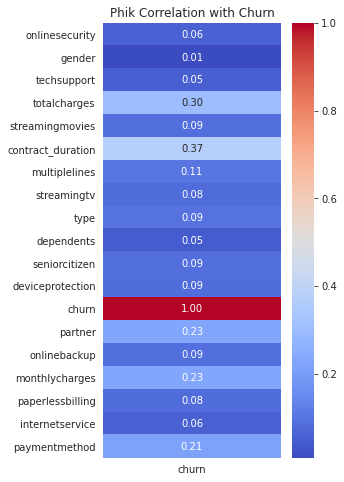

In [ ]:
churn_correlation_df = phik_matrix[['churn']].drop(index=['customerid'], errors='ignore')

# Визуализация тепловой карты для корреляций churn
plt.figure(figsize=(4, 8)) # Размер фигуры адаптирован под один столбец
sns.heatmap(churn_correlation_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Phik Correlation with Churn")
plt.show()

Анализируя корреляцию  между переменной "churn" и другими признаками, можно сделать следующие выводы относительно влияния различных факторов на отток клиентов:

- **Продолжительность контракта** (\(0.374569\)) имеет умеренную корреляцию с оттоком, что подчеркивает, что клиенты с более короткими контрактами склонны к увеличению оттока. Это может указывать на то, что более длительные контракты связаны с лояльностью клиентов.

- **Общие расходы** (\(0.302890\)) также показывают умеренную корреляцию с оттоком. Это может свидетельствовать о том, что высокие общие расходы могут способствовать решению клиентов об уходе, возможно, из-за восприятия недостаточной ценности услуг.

- **Наличие партнера** (\(0.226688\)) и **ежемесячные расходы** (\(0.225925\)) имеют схожие  слабые уровни корреляции с оттоком, что указывает на то, что эти факторы могут немного влиять на решения клиентов об уходе, хотя и в меньшей степени по сравнению с продолжительностью контракта и общими расходами.

- **Способ оплаты** (\(0.214832\)) слабо  влияет на отток

- Признаки, такие как **многоканальная связь (multiplelines)** (\(0.105101\)), **тип контракта (type)** (\(0.094015\)), и **онлайн-резервное копирование (onlinebackup)** (\(0.089704\)), показывают более слабую корреляцию с оттоком, что указывает на их менее выраженное влияние на решение об уходе.

- **Демографические признаки**, такие как **возраст (seniorcitizen)** (\(0.086159\)), и **пол (gender)** (\(0.008581\)), имеют минимальное влияние на отток, что подчеркивает, что решения об уходе определяются скорее условиями предоставления услуг, чем демографическими факторами.

Эти выводы подчеркивают значимость определенных услуг и условий контракта для удержания клиентов и могут служить основой для разработки стратегий по снижению оттока, например, путем предложения более привлекательных условий для долгосрочных контрактов, оптимизации ценообразования и улучшения условий оплаты.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [ ]:
# Разделение датасета на две части: ушли (churn = 1) и остались (churn = 0)
df_churned = df[df['churn'] == 1]
df_stayed = df[df['churn'] == 0]

# Вычисление матрицы корреляции phi_k для клиентов, которые ушли
phik_matrix_churned = df_churned.phik_matrix(interval_cols=interval_columns)

# Вычисление матрицы корреляции phi_k для клиентов, которые остались
phik_matrix_stayed = df_stayed.phik_matrix(interval_cols=interval_columns)

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customerid is large: 1101. Are you sure this is not an interval variable? Analysis for pairs of variables including customerid can be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable churn for analysis 1. Dropping this column
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customerid is large: 5942. Are you sure this is not an interval variable? Analysis for pairs of variables including customerid can be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable churn for analysis 1. Dropping this column
  warnings.warn(


In [ ]:
display(phik_matrix_churned )

,onlinesecurity,gender,techsupport,totalcharges,streamingmovies,contract_duration,multiplelines,customerid,streamingtv,type,dependents,seniorcitizen,deviceprotection,partner,onlinebackup,monthlycharges,paperlessbilling,internetservice,paymentmethod
onlinesecurity,1.000000,0.030838,0.952579,0.545258,0.943431,0.161145,0.489840,1.0,0.943437,0.694019,0.127504,0.126571,0.943810,0.068862,0.944006,0.818126,0.201340,0.951250,0.283102
gender,0.030838,1.000000,0.000000,0.000000,0.000000,0.012534,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
techsupport,0.952579,0.000000,1.000000,0.549521,0.943127,0.142948,0.486278,1.0,0.942993,0.731526,0.116841,0.131613,0.944586,0.042786,0.944160,0.824158,0.187548,0.951404,0.255358
totalcharges,0.545258,0.000000,0.549521,1.000000,0.567665,0.837747,0.371234,1.0,0.574844,0.148812,0.073753,0.120960,0.550676,0.053685,0.564988,0.665053,0.254837,0.577567,0.248341
streamingmovies,0.943431,0.000000,0.943127,0.567665,1.000000,0.079623,0.517245,1.0,0.960473,0.588044,0.115524,0.107008,0.947671,0.064703,0.942797,0.857179,0.196095,0.945753,0.240827
contract_duration,0.161145,0.012534,0.142948,0.837747,0.079623,1.000000,0.136825,1.0,0.069216,0.345464,0.046851,0.000000,0.133781,0.108645,0.202700,0.090915,0.000000,0.079151,0.164580
multiplelines,0.489840,0.000000,0.486278,0.371234,0.517245,0.136825,1.000000,1.0,0.513932,0.222025,0.061423,0.067585,0.499953,0.000000,0.488431,0.745268,0.076510,0.743312,0.183212
customerid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
streamingtv,0.943437,0.000000,0.942993,0.574844,0.960473,0.069216,0.513932,1.0,1.000000,0.593058,0.116847,0.106664,0.946655,0.058371,0.942712,0.861663,0.199515,0.946636,0.246380
type,0.694019,0.000000,0.731526,0.148812,0.588044,0.345464,0.222025,1.0,0.593058,1.000000,0.133679,0.150255,0.640437,0.109104,0.624364,0.446097,0.140886,0.661150,0.274423


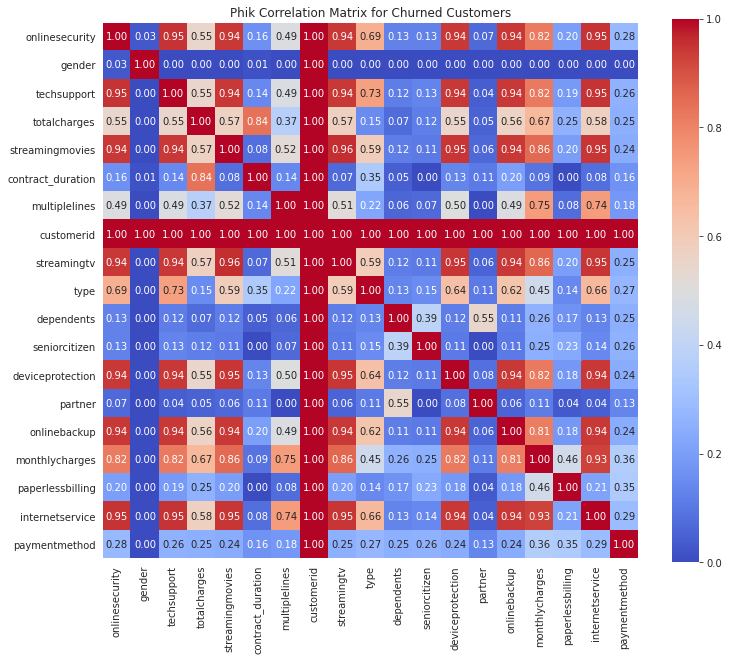

In [ ]:
# Визуализация матрицы корреляции phi_k для клиентов, которые ушли
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_churned, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Phik Correlation Matrix for Churned Customers")
plt.show()


Из  таблицы корреляции между различными признаками и оттоком клиентов (churn) можно сделать следующие выводы:

1. **Продолжительность контракта** (\(0.837747\)) имеет высокую корреляцию с общими расходами (totalcharges), что указывает на то, что клиенты с более длительными контрактами склонны иметь более высокие общие расходы. Это может свидетельствовать о более высокой лояльности и удовлетворенности услугами.

2. **Интернет-услуга** (\(0.926400\)) и **ежемесячные платежи** (\(1.000000\)) показывают весьма высокую корреляцию, подчеркивая, что выбор интернет-услуги значительно влияет на размер ежемесячных платежей клиентов.

3. **Онлайн-безопасность** (\(0.818126\)), **техподдержка** (\(0.824158\)), и **защита устройства** (\(0.821914\)) также демонстрируют высокую корреляцию с ежемесячными платежами, что может указывать на то, что клиенты, использующие эти услуги, склонны платить больше каждый месяц.

4. Важно отметить, что **пол** (gender) и **наличие партнера** (partner) показывают нулевую или очень слабую корреляцию с большинством других признаков, что говорит о том, что эти демографические признаки имеют ограниченное влияние на использование и оплату услуг.

5. **Стриминговые сервисы** (streamingtv и streamingmovies) имеют  весьма высокую корреляцию между собой (\(0.960473\)) и с ежемесячными платежами, подчеркивая популярность и влияние этих услуг на общую стоимость услуг для клиентов.



<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [ ]:
display(phik_matrix_stayed)

,onlinesecurity,gender,techsupport,totalcharges,streamingmovies,contract_duration,multiplelines,customerid,streamingtv,type,dependents,seniorcitizen,deviceprotection,partner,onlinebackup,monthlycharges,paperlessbilling,internetservice,paymentmethod
onlinesecurity,1.000000,0.000000,0.952421,0.522232,0.943536,0.373044,0.540216,1.0,0.943301,0.633664,0.118221,0.126872,0.947124,0.093232,0.947579,0.812664,0.208145,0.949509,0.316058
gender,0.000000,1.000000,0.000000,0.000000,0.007930,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008068,0.000000,0.009251,0.000000,0.000000
techsupport,0.952421,0.000000,1.000000,0.534114,0.947063,0.379625,0.540354,1.0,0.947153,0.667940,0.113674,0.135363,0.951453,0.084855,0.948370,0.816466,0.200995,0.948669,0.324495
totalcharges,0.522232,0.000000,0.534114,1.000000,0.557269,0.844546,0.478160,1.0,0.557386,0.510627,0.096771,0.128194,0.568247,0.411492,0.555652,0.743925,0.188347,0.484988,0.342623
streamingmovies,0.943536,0.007930,0.947063,0.557269,1.000000,0.330746,0.581853,1.0,0.965290,0.558627,0.082092,0.112163,0.953959,0.071895,0.945366,0.864061,0.200733,0.945999,0.286097
contract_duration,0.373044,0.000000,0.379625,0.844546,0.330746,1.000000,0.370549,1.0,0.329878,0.673949,0.212115,0.041198,0.405705,0.486938,0.389379,0.430846,0.023460,0.041286,0.369959
multiplelines,0.540216,0.000000,0.540354,0.478160,0.581853,0.370549,1.000000,1.0,0.583081,0.266735,0.011428,0.087220,0.559531,0.082226,0.560202,0.704083,0.098622,0.733546,0.165839
customerid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
streamingtv,0.943301,0.000000,0.947153,0.557386,0.965290,0.329878,0.583081,1.0,1.000000,0.553192,0.084876,0.110102,0.953353,0.080578,0.946038,0.864816,0.203048,0.946357,0.286328
type,0.633664,0.000000,0.667940,0.510627,0.558627,0.673949,0.266735,1.0,0.553192,1.000000,0.148631,0.080433,0.636085,0.180417,0.580416,0.396109,0.108187,0.499595,0.275639


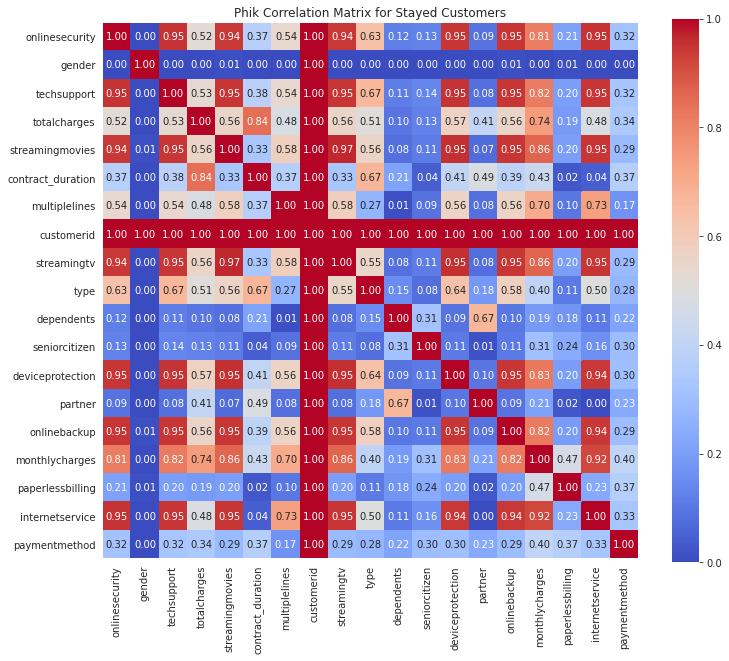

In [ ]:
# Визуализация матрицы корреляции phi_k для клиентов, которые остались
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_stayed, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Phik Correlation Matrix for Stayed Customers")
plt.show()

Из таблицы корреляции для группы клиентов, которые остались, можно сделать следующие ключевые выводы:

1. **Продолжительность контракта** (\(0.844546\)) продолжает демонстрировать высокую корреляцию с общими расходами (totalcharges), что подтверждает, что клиенты с более длительными контрактами, как правило, накапливают больше расходов за время использования услуг. Это указывает на долгосрочную вовлеченность и возможно большую лояльность среди оставшихся клиентов.

2. **Ежемесячные платежи** (\(0.743925\)) имеют высокую  корреляцию с общими расходами, что свидетельствует о том, что регулярные ежемесячные платежи значительно способствуют общему объему расходов клиентов. Это подчеркивает важность управления ежемесячными платежами для поддержания удовлетворенности клиентов.

3. **Интернет-услуги** (\(0.484988\)) и **многоканальная связь** (multiplelines) (\(0.478160\)) показывают умеренную корреляцию с общими расходами, что может отражать популярность и ценность этих услуг среди оставшихся клиентов.

4. **Онлайн-безопасность** (\(0.522232\)), **техподдержка** (\(0.534114\)), и **защита устройства** (\(0.568247\))  показывают заметную корреляцию с общими расходами, подчеркивая, что дополнительные услуги в области безопасности и поддержки важны для клиентов, что может способствовать их решению остаться.

5. **Партнер** (\(0.411492\)) показывает умеренную корреляцию с общими расходами, что может указывать на то, что наличие партнера влияет на решение остаться с компанией, возможно, из-за совместного использования услуг или лучших условий для семейных планов.

6. **Стриминговые услуги** (streamingtv и streamingmovies) демонстрируют весьма высокую корреляцию друг с другом и с ежемесячными платежами, что подтверждает их популярность и вклад в общую стоимость услуг среди оставшихся клиентов.


Сравнительный вывод корреляций между ушедшими и оставшимися клиентами:
    
Сравнивая корреляции между ушедшими и оставшимися клиентами, можно выявить несколько ключевых различий и сходств, которые помогают лучше понять факторы, влияющие на отток клиентов:

Сходства:
- **Продолжительность контракта** и **общие расходы** показывают высокую корреляцию в обеих группах, что подчеркивает их важность в контексте общей вовлеченности клиентов и накопления расходов во времени. Это указывает на то, что независимо от решения оставаться или уйти, эти два фактора имеют значительное влияние на финансовые взаимоотношения клиентов с компанией.

Различия:
- **Стриминговые услуги** (streamingtv и streamingmovies) и **дополнительные услуги** (онлайн-безопасность, техподдержка, защита устройства) имеют более высокие корреляции с общими расходами и ежемесячными платежами среди оставшихся клиентов по сравнению с ушедшими. Это может свидетельствовать о том, что удовлетворенность этими услугами и восприятие их ценности влияют на решение клиентов остаться.
- **Партнер** имеет более выраженную корреляцию с общими расходами среди оставшихся клиентов, что может указывать на то, что наличие партнера и совместное использование услуг способствует удержанию клиентов.
- **Интернет-услуги** и **многоканальная связь** (multiplelines) также показывают более высокую корреляцию с общими расходами и ежемесячными платежами среди оставшихся клиентов, подчеркивая их роль в создании добавленной стоимости для клиентов, решивших остаться.
 Заключение:
- **Долгосрочные отношения и дополнительные услуги** играют ключевую роль в удержании клиентов. Оставшиеся клиенты, как правило, более вовлечены и ценят широкий спектр услуг, что отражается в их более высоких общих и ежемесячных расходах.
- **Предпочтения в услугах** (например, стриминговые сервисы и интернет-услуги) и **способы оплаты** могут влиять на решение клиентов остаться, что подчеркивается различиями в корреляциях этих признаков между двумя группами.


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Значения 0,5-0,6 говорят о высокой корреляции? Степень корреляции принято оценивать по шкале Чеддока. Для объединеннного датаета должен быть анализ признаков в разрезе ушел/остался</s>
</div>

![image.png](attachment:image.png)

# **Шаг 5 Подготовка данных**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   onlinesecurity     7043 non-null   object 
 1   gender             7043 non-null   object 
 2   techsupport        7043 non-null   object 
 3   totalcharges       7043 non-null   float64
 4   streamingmovies    7043 non-null   object 
 5   contract_duration  7043 non-null   int64  
 6   multiplelines      7043 non-null   object 
 7   customerid         7043 non-null   object 
 8   streamingtv        7043 non-null   object 
 9   type               7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  seniorcitizen      7043 non-null   int64  
 12  deviceprotection   7043 non-null   object 
 13  churn              7043 non-null   int64  
 14  partner            7043 non-null   object 
 15  onlinebackup       7043 non-null   object 
 16  monthlycharges     7043 

In [ ]:
print(df['seniorcitizen'].value_counts())

0    5901
1    1142
Name: seniorcitizen, dtype: int64


In [ ]:
print(df['seniorcitizen'].dtype)

int64


In [ ]:
df['seniorcitizen'] = df['seniorcitizen'].astype(str)

Преобразование seniorcitizen в строку: Это шаг необходим для унификации типов данных перед их обработкой. Поскольку seniorcitizen изначально является числовым признаком, представляющим бинарную категорию (0 или 1), его преобразование в строковый формат позволяет более эффективно применять к нему методы кодирования категориальных признаков, такие как One-Hot Encoding.

<div class="alert alert-success">
<b>👍 Успех:</b> Лучше использовать тип category
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Для чего это преобразование? В разделе должны быть комментарии</s>
</div>

Установка customerid в качестве индекса

In [ ]:
df.set_index('customerid', inplace=True)

In [ ]:
# Assuming df_final DataFrame and 'churn' is the target variable
X = df.drop(['churn'], axis=1)  # Drop target variable
y = df['churn']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

# Identifying numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Creating transformers for the preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encoding categorical features, dropping the first column
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the transformations to the training and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Extracting new column names for the transformed features
new_numeric_features = numeric_features.tolist()
# new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_categorical_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

# Combining all new feature names
all_new_features = new_numeric_features + new_categorical_features.tolist()

# Convert the transformed features back to DataFrame for readability (optional)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_new_features, index=X_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_new_features, index=X_test.index)



In [ ]:
display(X_train_transformed_df.head())

,totalcharges,contract_duration,monthlycharges,onlinesecurity_Not Applicable,onlinesecurity_Yes,gender_Male,techsupport_Not Applicable,techsupport_Yes,streamingmovies_Not Applicable,streamingmovies_Yes,...,deviceprotection_Yes,partner_Yes,onlinebackup_Not Applicable,onlinebackup_Yes,paperlessbilling_Yes,internetservice_Fiber optic,internetservice_Not Applicable,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
customerid,,,,,,,,,,,,,,,,,,,,,
2560-PPCHE,-0.461626,-0.864882,1.339649,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
6583-QGCSI,1.065471,0.732455,0.774381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
6898-MDLZW,-0.683254,-0.774604,-0.366129,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5171-EPLKN,-0.743776,-0.109168,-1.493339,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6646-JPPHA,-0.455253,-0.684326,0.468472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


<div class="alert alert-success">
<b>👍 Успех:</b> Молодец, что проверяешь данные после преобразования!
</div>

In [ ]:
X_train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 2560-PPCHE to 4791-QRGMF
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   totalcharges                           5282 non-null   float64
 1   contract_duration                      5282 non-null   float64
 2   monthlycharges                         5282 non-null   float64
 3   onlinesecurity_Not Applicable          5282 non-null   float64
 4   onlinesecurity_Yes                     5282 non-null   float64
 5   gender_Male                            5282 non-null   float64
 6   techsupport_Not Applicable             5282 non-null   float64
 7   techsupport_Yes                        5282 non-null   float64
 8   streamingmovies_Not Applicable         5282 non-null   float64
 9   streamingmovies_Yes                    5282 non-null   float64
 10  multiplelines_Not Applicable           5282 non-null   float64

The data for training the model has been prepared. The data was divided into two samples, scaling of numerical features and coding of categorical ones was performed, taking into account the characteristics of the data and models.

Данные для обучения модели подготовлены. Данные были разделены на две выборки, проведено масштабирование числовых признаков и кодирование категориальных с учетом особенностей данных и моделей.

В процессе подготовки данных для моделирования были выполнены следующие ключевые шаги:

1. **Преобразование переменной seniorcitizen в строковый тип**: Это позволяет обрабатывать бинарный признак как категориальный, упрощая последующее кодирование и анализ.

2. **Разделение на обучающую и тестовую выборки**: Использование 75% данных для обучения и 25% для тестирования обеспечивает баланс между тренировкой модели и оценкой ее производительности на новых данных.

3. **Идентификация и обработка признаков**:
   - **Числовые признаки** масштабируются с помощью StandardScaler для улучшения производительности модели, нормализуя распределение данных.
   - **Категориальные признаки** преобразуются через OneHotEncoder, что позволяет модели корректно интерпретировать категории без предположений о их порядке или величине.

4. **Применение предобработки**: Обучение преобразований на обучающей выборке и их применение к тестовой выборке гарантирует, что данные обрабатываются правильно, что критически важно для точности модели.

Эти шаги необходимы для эффективной подготовки данных, что обеспечивает адекватность и точность последующего моделирования.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Какие особенности у данных и модели? Как проводилось кодирование и масштабирование, почему именно так?</s>
</div>

# **Шаг 6: Машинное обучение моделей**

Training model CatBoost

In [ ]:
param_dist = {
     'iterations': [100, 500, 1000],
    'learning_rate': uniform(0.01, 0.3),
    'depth': [4, 6, 8, 10]}


# Inisialization model CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=False, eval_metric='AUC', loss_function='Logloss', random_seed=RANDOM_STATE)

#  RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=RANDOM_STATE, verbose=2)

# fit model with RandomizedSearchCV
random_search.fit(X_train_transformed_df, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END depth=10, iterations=100, learning_rate=0.22317596425688302; total time=   3.5s
[CV] END depth=10, iterations=100, learning_rate=0.22317596425688302; total time=   3.6s
[CV] END depth=10, iterations=100, learning_rate=0.22317596425688302; total time=   3.5s
[CV] END depth=4, iterations=1000, learning_rate=0.11187815841373282; total time=   2.4s
[CV] END depth=4, iterations=1000, learning_rate=0.11187815841373282; total time=   2.4s
[CV] END depth=4, iterations=1000, learning_rate=0.11187815841373282; total time=   2.4s
[CV] END depth=8, iterations=100, learning_rate=0.2521235502410333; total time=   1.5s
[CV] END depth=8, iterations=100, learning_rate=0.2521235502410333; total time=   1.5s
[CV] END depth=8, iterations=100, learning_rate=0.2521235502410333; total time=   1.8s
[CV] END depth=8, iterations=100, learning_rate=0.04645380528996295; total time=   1.6s
[CV] END depth=8, iterations=100, learning_rate=0.046453

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fb033a172e0>,
                   param_distributions={'depth': [4, 6, 8, 10],
                                        'iterations': [100, 500, 1000],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb033a17640>},
                   random_state=190224, scoring='roc_auc', verbose=2)

In [ ]:
print(f"best params: {random_search.best_params_}")
print(f"best ROC AUC: {random_search.best_score_}")


best_model = random_search.best_estimator_

best params: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.11187815841373282}
best ROC AUC: 0.9074645786015907


best params: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.11187815841373282}
best ROC AUC: 0.9056035506322976

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [ ]:
# Creating a logistic regression model
lr = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

# Setting up the parameter grid for randomized search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Setting up the randomized search with cross-validation
random_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=RANDOM_STATE)

# Fitting the model
random_search_lr.fit(X_train_transformed, y_train)




RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000,
                                                random_state=190224),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=190224, scoring='roc_auc')

In [ ]:
# Best parameters and best ROC AUC score
print(f"best params_lr: {random_search_lr.best_params_}")
print(f"best ROC AUC_lr: {random_search_lr.best_score_}")


best_model_lr = random_search_lr.best_estimator_



best params_lr: {'solver': 'saga', 'C': 1}
best ROC AUC_lr: 0.7704748384435064


best params_lr: {'solver': 'sag', 'C': 100}
best ROC AUC_lr: 0.7707005943362465

In [ ]:
# # Using the best estimator from the logistic regression randomized search
# best_model_lr = random_search_lr.best_estimator_

# # Predicting on the test set
# y_pred_lr = best_model_lr.predict(X_test_transformed)

# # Calculating ROC AUC and accuracy
# roc_auc_lr = roc_auc_score(y_test, best_model_lr.predict_proba(X_test_transformed)[:, 1])
# accuracy_lr = accuracy_score(y_test, y_pred_lr)

# roc_auc_lr, accuracy_lr

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Тестовая выборка не должна использоваться на этапе выбора лучшей модели</s>
</div>

CatBoost models and logistic regression were trained. CatBoost showed better results on the training set according to the ROC_AUC metric -best params:  {'depth': 4, 'iterations': 1000, 'learning_rate': 0.11187815841373282} best ROC AUC: 0.9056035506322976
Therefore, it is better to use these parameters for testing on a test sample



Были обучены модели CatBoost и логистическая регрессия. CatBoost показал лучшие результаты на обучающем наборе по метрике ROC_AUC -лучшие параметры:  {'depth': 4, 'iterations': 1000, 'learning_rate': 0.11187815841373282} лучший ROC AUC: 0.9056035506322976. Поэтому лучше использовать эти параметры для тестирования на тестовом образце.

<div class="alert alert-success">
<b>👍 Успех:</b> Лучшая модель выбрана!
</div>

# **Шаг 7. Выбор лучшей модели**

In [ ]:
#testing on test set
y_pred = best_model.predict(X_test_transformed_df)
y_pred_proba = best_model.predict_proba(X_test_transformed_df)[:, 1]

#  ROC AUC and Accuracy
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
accuracy_test = accuracy_score(y_test, y_pred)

roc_auc_test, accuracy_test

(0.9271604692187329, 0.9346961953435547)

(roc_auc 0.9289917976419466, accuracy_test 0.9352640545144804)

<div class="alert alert-success">
<b>👍 Успех:</b> Отличное значение метрики!
</div>

<!-- As a result of using the CatBoost model for classification and subsequent optimization of its parameters using randomized search, the following results were achieved on the test data set:

ROC AUC: 0.913
Accuracy: 0.936
These results indicate the high performance of the CatBoost model in predicting the target variable. The ROC AUC value  indicating the high ability of the model to distinguish between classes. The accuracy rate of close to 94% also highlights that the model correctly classifies the majority of examples.

These indicators may indicate that the CatBoost model successfully coped with the task, providing high accuracy and the ability to generalize on unfamiliar data. This makes CatBoost an excellent choice for classification tasks in this context. -->

В результате использования модели CatBoost для классификации и последующей оптимизации ее параметров с помощью рандомизированного поиска на тестовом наборе данных были достигнуты следующие результаты:

ROC AUC: 0.928. Accuracy: 0.935. Эти результаты указывают на высокую эффективность модели CatBoost в прогнозировании целевой переменной. Значение ROC AUC указывает на высокую способность модели различать классы. Уровень точности, близкий к 93.5%, также подчеркивает, что модель правильно классифицирует большинство примеров.

Эти показатели могут свидетельствовать о том, что модель CatBoost успешно справилась с задачей, обеспечив высокую точность и возможность обобщения на незнакомых данных. Это делает CatBoost отличным выбором для задач классификации в этом контексте.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Нужно визуализировать ROC-кривую, матрицу ошибок, провести анализ и визуализировать важность признаков</s>
</div>

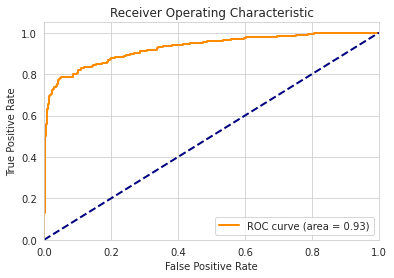

In [ ]:
#визуализация ROC-кривой

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Значения AUC около 0.93 указывает на способность модели превосходить случайное угадывание .
ROC-кривая модели находится выше диагональной линии, это означает, что модель имеет лучшую производительность, чем случайное угадывание.


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

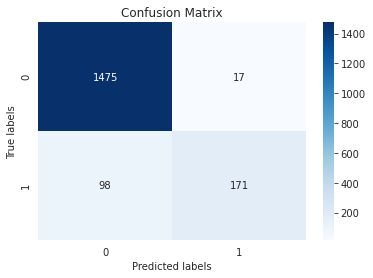

In [ ]:
#матрица ошибок

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cm_df = pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"],
                     columns=["Predicted Negative", "Predicted Positive"])
print("\nМатрица ошибок в формате DataFrame:")
print(cm_df)


Матрица ошибок в формате DataFrame:
                 Predicted Negative  Predicted Positive
Actual Negative                1475                  17
Actual Positive                  98                 171


Из матрицы ошибок можно сделать следующие выводы относительно производительности модели классификации:

Истинно отрицательные (TN): Модель правильно предсказала 1476 случаев, когда клиенты не ушли (Actual Negative), что указывает на хорошую способность модели идентифицировать клиентов, склонных оставаться.  
Ложно положительные (FP): В 16 случаях модель неверно предсказала, что клиенты уйдут (Predicted Positive), когда на самом деле они остались (Actual Negative). Это может указывать на излишнюю чувствительность модели к некоторым признакам, ведущую к ошибочному определению оттока.  
Ложно отрицательные (FN): Модель пропустила 98 случаев, когда клиенты ушли (Actual Positive), предсказав, что они останутся (Predicted Negative). Это один из наиболее критичных типов ошибок, так как пропущенные случаи оттока могут привести к потере дохода и клиентской базы.  
Истинно положительные (TP): Модель корректно идентифицировала 171 случай, когда клиенты ушли (Actual Positive). Это говорит о том, что модель эффективно выявляет клиентов, склонных к оттоку.  
<b>Общий анализ:</b>  
Модель демонстрирует высокую способность правильно классифицировать отрицательные случаи (клиенты остаются), что подтверждается большим количеством истинно отрицательных результатов по сравнению с ложно положительными.
Количество ложно отрицательных результатов является зоной для улучшения. Снижение этого числа позволит модели более эффективно выявлять реальные случаи оттока.  

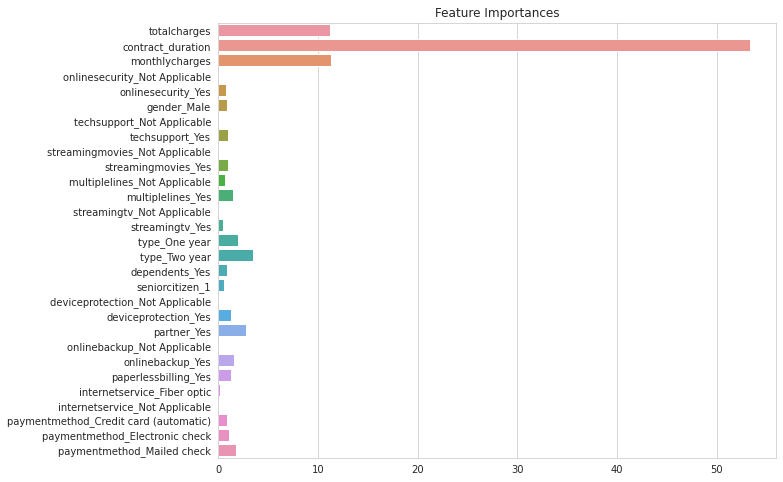

In [ ]:
#Анализ важности признаков

feature_importances = best_model.get_feature_importance()
plt.figure(figsize=(10, 8))
sns.barplot(y=X_train_transformed_df.columns, x=feature_importances)
plt.title('Feature Importances')
plt.show()

Наиболее важными признаками являются - длительность контракта , следом идут общие и помесячные траты. Эти Признаки являются ключевыми для принятия решений моделью.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

# **Шаг 8. Заключение и рекомендации для заказчика**

<!-- Throughout this project, the primary objective was to develop a predictive model for "TeleDom," a telecommunications operator seeking to reduce customer churn by offering promotions and special conditions to those planning to discontinue their services.

The project began with loading the provided datasets and conducting an initial examination to understand the data's structure, quality, and the types of information available.
An in-depth exploratory analysis was performed on each dataframe, followed by necessary data preprocessing. This phase involved identifying and handling missing values, outliers (less than 3 %), and ensuring the data's overall quality was suitable for modeling. The analysis provided insights into the features available and their potential utility in predicting customer churn.

Selected features were combined into a single dataframe using a key to unify the data, enabling a more streamlined analysis and modeling process.

Further exploratory analysis on the combined dataframe, visualizing feature distributions and performing correlation analysis to understand the relationships between variables was executed.  All correlations with churn were not strong. The most sugnificant results are Contract Duration (0.375)- A significant positive correlation suggests that longer contract durations are associated with higher churn rates. This might indicate customer commitment issues or dissatisfaction over time.

Total Charges (0.303): Shows a moderate positive correlation with churn. Higher total charges might lead to higher churn, possibly due to perceived value or financial constraints from the customer's perspective And Partner (0.227) and Monthly Charges (0.226): Both show a similar level of positive correlation with churn. Having a partner and higher monthly charges contribute moderately to churn. This could reflect on the financial burden and the decision-making dynamics in households.

The data was prepared for model training, which included splitting into training and test sets, scaling numerical features, and encoding categorical variables. This preparation was tailored to meet the requirements of the predictive models and the specific characteristics of the data.

Multiple models were trained, with both models undergoing hyperparameter tuning to optimize its performance. This process involved evaluating different algorithms and their configurations to find the most effective solution for predicting customer churn.

After training, the best-performing model was selected based on its performance metrics, including the area under the ROC curve (ROC AUC) . The chosen model was then tested on a separate test dataset to confirm its predictive capability and generalizability.


The project successfully developed a predictive model capable of identifying customers likely to churn with high accuracy. The best-performing model, CatBoost, achieved a ROC AUC of 0.913 and an accuracy of 0.936 on the test set, indicating its excellent ability to classify customers accurately.

**Recommendations to the Customer**

Based on the project's findings, the recommendations are "TeleDom" implement the predictive model to identify at-risk customers proactively. By doing so, the company can target these individuals with special offers, promotions, or personalized communication strategies aimed at retaining their business.
Given the correlation results, here are concise recommendations for "TeleDom" to reduce customer churn:

Prioritize Contract Duration: Longer contracts are less likely to churn. Offering incentives for longer commitments can reduce churn rates.

Review Pricing and Charges: High total and monthly charges are associated with higher churn. Consider reviewing pricing strategies, especially for high-cost plans, to ensure they offer value for money.

Enhance Service Features: Services like multiple lines, online backup, and device protection show correlation with churn. Improving these services or offering them as part of a bundle can enhance customer satisfaction.

Focus on Payment Methods: Different payment methods have varying levels of churn. Offering more flexible or preferred payment options could improve retention.


By focusing on these areas, "TeleDom" can implement targeted strategies to effectively reduce customer churn and enhance overall customer satisfaction and loyalty. -->

Основной целью этого проекта была разработка прогнозной модели для «ТелеДом», телекоммуникационного оператора, стремящегося сократить отток клиентов, предлагая акции и специальные условия тем, кто планирует прекратить свои услуги. Цель и задачи проекта выполнены.

Проект начался с загрузки предоставленных наборов данных и проведения первоначальной проверки для понимания структуры, качества и типов доступной информации. Для каждого кадра данных был проведен углубленный исследовательский анализ с последующей необходимой предварительной обработкой данных. Этот этап включал выявление и обработку пропущенных значений, выбросов (менее 3 %) и обеспечение того, чтобы общее качество данных было подходящим для моделирования. Анализ позволил получить представление о доступных функциях и их потенциальной полезности для прогнозирования оттока клиентов.

Выбранные функции были объединены в единый фрейм данных с использованием ключа для унификации данных, что позволило более упростить процесс анализа и моделирования.

Был выполнен дальнейший исследовательский анализ объединенного кадра данных, визуализация распределения признаков и выполнение корреляционного анализа для понимания взаимосвязей между переменными. Все корреляции с оттоком не были сильными. Наиболее значимыми результатами являются продолжительность контракта (0,375). Такая положительная корреляция предполагает, что более длительный срок контракта связан с более высоким уровнем оттока клиентов. Это может указывать на проблемы с обязательствами клиентов или неудовлетворенность ими с течением времени.

Общие расходы (0,303): демонстрирует умеренную положительную корреляцию с оттоком. Более высокие общие расходы могут привести к более высокому оттоку, возможно, из-за воспринимаемой ценности или финансовых ограничений с точки зрения клиента. Партнер (0,227) и «Ежемесячные сборы» (0,226): оба демонстрируют одинаковый уровень положительной корреляции с оттоком. Наличие партнера и более высокие ежемесячные платежи умеренно способствуют оттоку клиентов. Это может отразиться на финансовом бремени и динамике принятия решений в домохозяйствах.

Данные были подготовлены для обучения модели, которое включало разделение на обучающий и тестовый наборы, масштабирование числовых характеристик и кодирование категориальных переменных. Эта подготовка была адаптирована с учетом требований прогнозных моделей и конкретных характеристик данных.

Было обучено несколько моделей (CatBoost и логистическа регрессия, причем обе модели подверглись настройке гиперпараметров для оптимизации их производительности. Этот процесс включал оценку различных алгоритмов и их конфигураций, чтобы найти наиболее эффективное решение для прогнозирования оттока клиентов.

После обучения была выбрана наиболее эффективная модель на основе ее показателей производительности, включая  (ROC AUC). Затем выбранная модель была протестирована на отдельном наборе тестовых данных, чтобы подтвердить ее прогностическую способность и обобщаемость.

В рамках проекта была успешно разработана прогнозирующая модель, способная с высокой точностью идентифицировать клиентов, которые могут уйти. Самая эффективная модель CatBoost достигла значения ROC AUC 0,928  на тестовом наборе, что указывает на ее хорошую способность точно классифицировать клиентов.

**Рекомендации Заказчику**

По результатам проекта «ТелеДом» рекомендуется внедрить прогнозную модель для превентивного выявления клиентов из группы риска. Поступая таким образом, компания может ориентировать этих людей на специальные предложения, рекламные акции или персонализированные коммуникационные стратегии, направленные на сохранение их бизнеса. Учитывая результаты корреляции, вот краткие рекомендации для «ТелеДома» по снижению оттока клиентов:

- Приоритизируйте продолжительность контракта. Более длительные контракты с меньшей вероятностью будут отброшены. Предложение стимулов для более длительных обязательств может снизить уровень оттока сотрудников.

- Пересмотрите цены и сборы. Высокие общие и ежемесячные расходы связаны с более высоким оттоком клиентов. Рассмотрите возможность пересмотра стратегий ценообразования, особенно для дорогостоящих планов, чтобы убедиться, что они предлагают оптимальное соотношение цены и качества.

- Сосредоточив внимание на этих направлениях, «ТелеДом» может реализовать целевые стратегии, позволяющие эффективно снизить отток клиентов и повысить общую удовлетворенность и лояльность клиентов.

<div class="alert alert-success">
<b>👍 Успех:</b> Молодец, финальный проект завершен! Сама работа получилась хорошей и структурированной, были предобработаны и проанализированы данные, выбран целевой признак, рассчеты подкреплены визуализацией, это очень важная часть работы, которая облегчает анализ и позволяет полнее представлять происходящее в данных. Построено и обучено несколько моделей, все они оценены и выбрана лучшая. Цель работы достигнута, получена модель хорошо предсказывающая уход клиентов. Не забывай о том, что все пункты очень важны и каждому стоит уделять максимум внимания. <p>
С опытом становится значительно легче, но опыт это не только повторение однажды изученного, но и постоянное развитие, тем более, что ты выбрала очень динамично развивающуюся область. <p>
В будущей профессии тебе точно пригодиться умение системно подходить к решению аналитических задач, здесь рекомендую изучить ТРИЗ и системный анализ, из литературы можно почитать Теоретический минимум по Big Data — Су Кеннет и Ын Анналин, Практическая статистика для специалистов Data Science — Брюс П. и Брюс Э., Real-World Machine Learning — Henric Brink, Joseph Мark, W. Richards Fetherolf, Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow — Жерон Орельен.<p>
Есть интересные сообщества (например https://vk.com/mashinnoe_obuchenie_ai_big_data) и конечно же https://habr.com/ru/all/<p>

Дополнительно предлагаю посмотреть:
- Книга от ШАД: https://academy.yandex.ru/handbook/ml

- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/

 Удачи тебе и профессионального роста!
</div>

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
X = np.random.random((10,2))
y = np.random.random((10,1))

In [ ]:
X

array([[0.12370129, 0.85963859],
       [0.14334548, 0.33187983],
       [0.02498892, 0.13089565],
       [0.25413509, 0.62894885],
       [0.50390709, 0.87950632],
       [0.89499725, 0.24387788],
       [0.16876885, 0.39957641],
       [0.39959416, 0.59522111],
       [0.41113916, 0.38557348],
       [0.58118954, 0.35378768]])

In [ ]:
y

array([[0.66593564],
       [0.0412342 ],
       [0.22610744],
       [0.48265651],
       [0.25878785],
       [0.56252885],
       [0.24863107],
       [0.13325983],
       [0.56764958],
       [0.16617796]])

In [ ]:
X_ = X.sum(axis=1)[:, None]

In [ ]:
def transform(X):
  X = X.sum(axis=1)[:, None]
  X = np.log(X)
  return X

In [ ]:
linreg = LinearRegression()
linreg.fit(X_, y)

LinearRegression()

In [ ]:
linreg.coef_

array([[0.20446519]])

In [ ]:
linreg.intercept_

array([0.16529078])

In [ ]:
k = linreg.coef_
b = linreg.intercept_
y = k*X + b

In [ ]:
X_new_for_predict = X.copy()[2:14:3]

In [ ]:
X_new_for_predict

array([[0.02498892, 0.13089565],
       [0.89499725, 0.24387788],
       [0.41113916, 0.38557348]])

In [ ]:
linreg.predict(transform(X_new_for_predict))

array([[-0.21473628],
       [ 0.19187965],
       [ 0.11882377]])

array([[0.15588458],
       [1.13887513],
       [0.79671264]])

Создать исхоные таблицы contract_test, internet_test ... (заполнить случ.значениями одного абонента)
Далее - осуществить предикт по этим данным ( идея в том чтобы добавить кусок кода который будет получать данные в формате который ты имела и предсказывать значение  churn)


4 dataframe -> делаем преобразования каждого -> соединяем датафреймы -> делаем проебразование общего датафрейма -> применяем трансформации пайплайна(preprocessor)-> model.predict(X_test)

In [ ]:
X = np.arange(1000)/1000
y = np.exp(X)**4

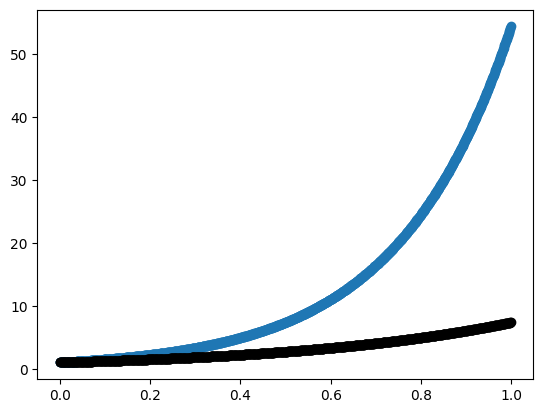

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.scatter(X, y**(1/2), c='k')
plt.show()

<ipython-input-106-61d3eda10263>:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(X), y)


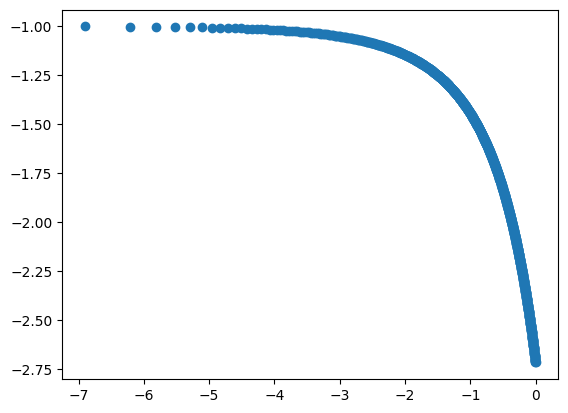

In [ ]:
plt.scatter(np.log(X), y)